In [1]:
import time
t_start = time.time()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [3]:
np.random.seed(123)

In [4]:
N_FILES = 6

In [5]:
"""
Original link: https://www.kaggle.com/c/decoding-the-human-brain/data
"""

# def create_data():
#     path = "Swarm_Behaviour.csv"
#     total_df = pd.read_csv(path)
#     N_COLS = len(total_df.columns)
#     # this creates the slices from the original csv (too large to commit)
#     for i in range(N_FILES):
#         slice_df = total_df[total_df.columns[i * N_COLS // N_FILES: (i+1) * N_COLS // N_FILES]]
#         slice_df.to_parquet(f'slice{i}.parquet.gzip')

# create_data()

'\nOriginal link: https://www.kaggle.com/c/decoding-the-human-brain/data\n'

In [6]:
# use this cell to recreate the original dataframe using the slices
dfs = []

for i in range(N_FILES):
    slice_df = pd.read_parquet(f'slice{i}.parquet.gzip')
    dfs.append(slice_df)

original_df = pd.concat(dfs, axis=1)

In [7]:
original_df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [8]:
df = original_df.reset_index().rename(columns={"index": "id"})
COLS = ["id", 'x', 'y', 'xVel', 'yVel', 'xA', 'yA', 'xS', 'yS', 'xC', 'yC', 'nAC', 'nS']
N_BOIDS = 200
INT_DIGITS = 3

In [9]:
target = df[["id", "Swarm_Behaviour"]].astype(int)
df = df.drop("Swarm_Behaviour", axis=1)

<Axes: >

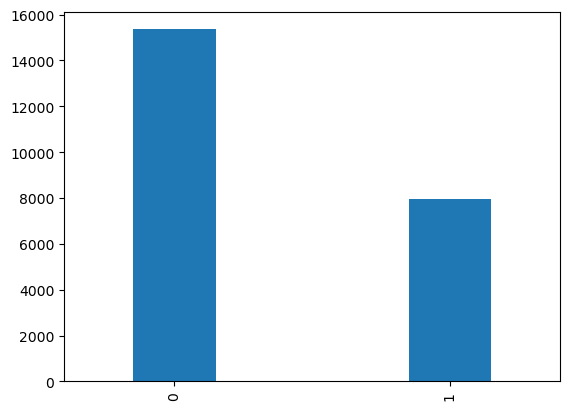

In [10]:
target.Swarm_Behaviour.value_counts().plot.bar(width=0.3)

In [11]:
target.Swarm_Behaviour

0        0
1        0
2        0
3        0
4        0
        ..
23304    0
23305    0
23306    0
23307    0
23308    0
Name: Swarm_Behaviour, Length: 23309, dtype: int64

In [12]:
zeroes = target[target.Swarm_Behaviour == 0].index
ones = target[target.Swarm_Behaviour == 1].index
filtered_zeroes = np.random.choice(zeroes, 8000, False)

In [13]:
target = target[target.index.isin(filtered_zeroes) | target.index.isin(ones)].reset_index(drop=True)
df = df[df.index.isin(filtered_zeroes) | df.index.isin(ones)].reset_index(drop=True)

In [14]:
target.head(5)

,id,Swarm_Behaviour
0,0,0
1,2,0
2,3,0
3,4,0
4,6,0


In [15]:
df.head(5)

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,...,-8.04,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0
1,2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,...,-8.02,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1
2,3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,...,-3.44,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0
3,4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,...,10.49,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0
4,6,608.66,997.24,11.84,2.77,0.31,-0.08,0.0,0.0,0.00,...,-8.98,-2.67,-0.04,-0.09,0.00,0.00,-0.03,0.0,3,1


<Axes: >

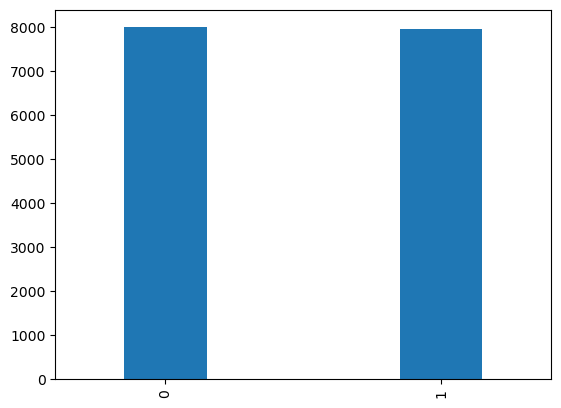

In [16]:
target.Swarm_Behaviour.value_counts().plot.bar(width=0.3)

In [17]:
# changes column string formatting
reformatted_cols = ["id"] + [f"{COLS[i]}_{j:0{INT_DIGITS}}" for j in range(1, N_BOIDS+1) for i in range(1, len(COLS))]
df.columns = reformatted_cols

In [18]:
df.head(2)

,id,x_001,y_001,xVel_001,yVel_001,xA_001,yA_001,xS_001,yS_001,xC_001,...,xVel_200,yVel_200,xA_200,yA_200,xS_200,yS_200,xC_200,yC_200,nAC_200,nS_200
0,0,562.05,-0.62,-10.70,-4.33,0.0,0.0,0.0,0.0,0.00,...,-8.04,-15.15,0.0,0.0,0.0,0.0,0.00,0.0,28,0
1,2,200.16,-320.07,4.01,-6.37,0.0,0.0,0.0,0.0,0.18,...,-8.02,-9.38,0.0,0.0,0.0,0.0,-0.11,-0.3,15,1


In [19]:
melted = df.melt(id_vars="id")
variable_raw = melted.variable.copy()
melted["variable"] = variable_raw.apply(lambda string: string.split("_")[0])
melted["boid"] = variable_raw.apply(lambda string: string.split("_")[1]).astype(int)

In [20]:
variables = melted.variable.unique()
means = melted.groupby(["id", "variable"]).value.mean().unstack()
means.columns = [f"{col}_mean" for col in variables]

stds = melted.groupby(["id", "variable"]).value.std().unstack()
stds.columns = [f"{col}_std" for col in variables]


In [21]:
features = pd.concat([means, stds], axis=1)

<Axes: >

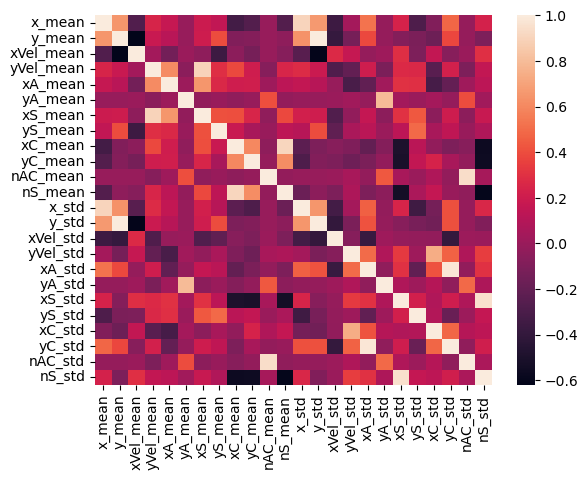

In [22]:
sns.heatmap(features.corr())

In [23]:
# possible features
# xS, yS, xA, yA, xC, yC
# which way the birds are looking (angle, derived from velocity)


# how do we aggregate these features?

# how wide an arc encompasses all the birds direction?
# area of the box encompassing all the birds x,y coords
# ranges of the x and y velocities

 

# in principle we are taking information from a distribution (n=200)

<Axes: xlabel='xVel', ylabel='yVel'>

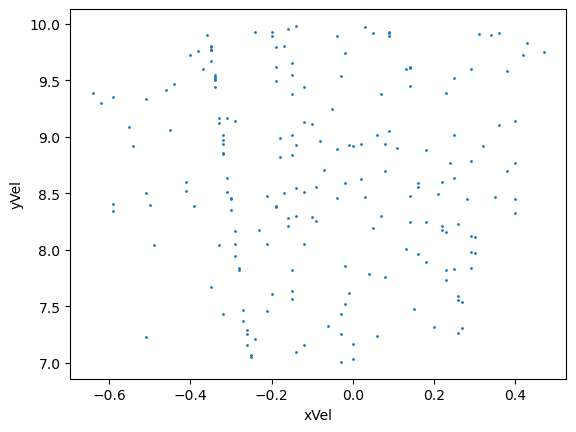

In [24]:


# plotting features together

# picking an id (experiment)
a = melted[melted['id'] == 90] # target = 1

# picking an x and y feature
var1 = "xVel"
var2 = "yVel"
b = a[a.variable.isin({var1, var2})]

xs = b[b.variable == var1].value.reset_index(drop=True)
ys = b[b.variable == var2].value.reset_index(drop=True)
locations = pd.DataFrame()
locations[var1] = xs
locations[var2] = ys

plt.Figure()
locations.plot.scatter(var1, var2, s=1)

In [25]:
x = melted[melted.variable == "x"]
y = melted[melted.variable == "y"]
xVel = melted[melted.variable == "xVel"]
yVel = melted[melted.variable == "yVel"]

In [26]:
location = x.merge(y, on=["id", "boid"]).drop(["variable_x", "variable_y"], axis=1)
vels =  xVel.merge(yVel, on=["id", "boid"]).drop(["variable_x", "variable_y"], axis=1)

In [27]:
vels["angle1"] = 180 / np.pi * np.arctan2(vels.value_x, vels.value_y)
vels["angle2"] = vels["angle1"].apply(lambda x: x + 360 if x < 0 else x)

In [28]:
a1 = vels.groupby(["id"]).angle1
a2 = vels.groupby(["id"]).angle2

a1_range = a1.max() - a1.min()
a2_range  = a2.max() - a2.min()

angle_range = np.minimum(a1_range, a2_range)

In [29]:
# a feature!
angle_range

id
0        350.776639
2        356.459202
3         90.210745
4        352.510045
6        353.576642
            ...    
23299    344.314936
23302     43.949757
23304    349.989500
23305    322.689350
23307    350.082281
Length: 15954, dtype: float64

In [30]:
target

,id,Swarm_Behaviour
0,0,0
1,2,0
2,3,0
3,4,0
4,6,0
...,...,...
15949,23299,0
15950,23302,1
15951,23304,0
15952,23305,0


<Axes: >

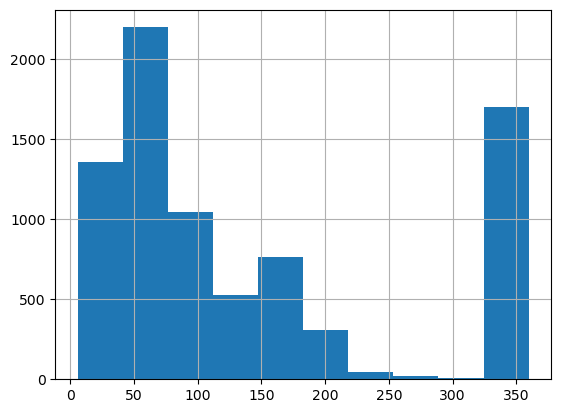

In [31]:
angle_range.reset_index(drop=True)[target.Swarm_Behaviour == 1].hist()

<Axes: >

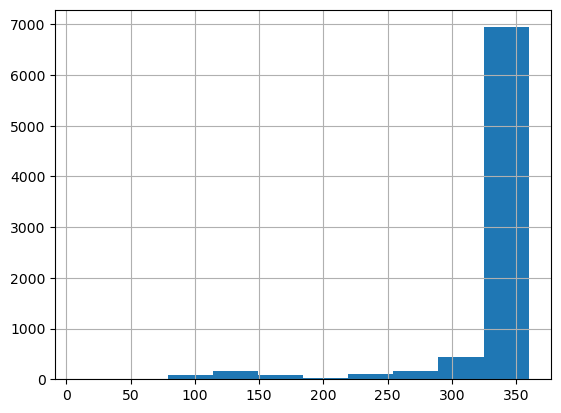

In [32]:
angle_range.reset_index(drop=True)[target.Swarm_Behaviour == 0].hist()

In [33]:
vels.groupby(["id"]).angle1

In [34]:
angles1 = pd.Series(180 / np.pi * np.arctan2(xs, ys))
angles2 = angles1.apply(lambda x: x + 360 if x < 0 else x)

angles_range = min(angles2.max() - angles2.min(), angles1.max() - angles1.min())
angles_range

6.80637105856642

<Axes: >

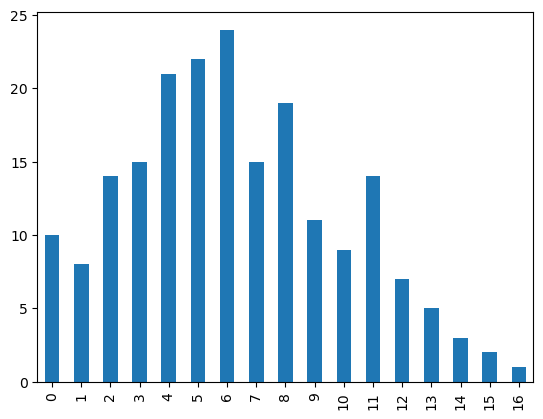

In [35]:
a[a.variable == "nAC"].value.astype(int).value_counts().sort_index().plot.bar()

In [36]:
diffs = a[a.variable == "nAC"].value.astype(int).value_counts().sort_index().diff()

abs(diffs.sum()) / diffs.abs().sum()

0.15254237288135594

<Axes: >

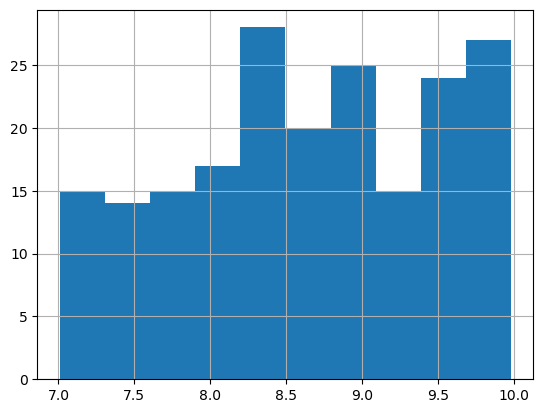

In [37]:
plt.Figure()
((xs**2 + ys**2) ** 0.5).hist()

In [38]:
# need the id and the boid numbers
x = melted[melted.variable == "xS"]
y = melted[melted.variable == "yS"]

In [39]:
new = x.merge(y, on=["id", "boid"])

In [40]:
new["d"] = (new.value_x ** 2 + new.value_y**2) ** 0.5

In [41]:
new.groupby("id").d.std().reset_index(drop=True)[target.Swarm_Behaviour == 1].describe()

count    7954.000000
mean        5.381640
std        45.943900
min         0.000000
25%         0.000000
50%         0.445272
75%         0.737385
max      2247.631218
Name: d, dtype: float64

In [42]:
new.groupby("id").d.std().reset_index(drop=True)[target.Swarm_Behaviour == 0].describe()

count      8000.000000
mean       1076.360716
std       12285.643838
min           0.000000
25%           0.218695
50%           0.988450
75%           6.195666
max      297076.109288
Name: d, dtype: float64

In [43]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
features["angle_range"] = angle_range

In [45]:
features

,x_mean,y_mean,xVel_mean,yVel_mean,xA_mean,yA_mean,xS_mean,yS_mean,xC_mean,yC_mean,...,yVel_std,xA_std,yA_std,xS_std,yS_std,xC_std,yC_std,nAC_std,nS_std,angle_range
id,,,,,,,,,,,,,,,,,,,,,
0,35.495,0.265,10.27850,0.00000,0.00000,0.00000,-3.10760,-4.16675,0.00000,0.00000,...,0.000000,0.000000,0.000000,5.732348,582.479151,0.000000,0.000000,0.000000,6.723990,350.776639
2,9.160,0.060,32.77955,0.00000,-0.00755,0.00105,-0.45095,59.53900,0.00000,-0.12710,...,0.000000,0.203797,0.116737,6.369284,588.192326,0.000000,0.210280,0.114204,6.434694,356.459202
3,11.740,0.105,-11.52095,-0.07315,0.00000,-0.01135,-0.69555,-46.07760,1.03220,0.00000,...,0.109712,0.000000,0.746680,2.067728,576.061088,0.012244,0.000000,0.941464,1.690816,90.210745
4,13.425,0.330,-145.79650,-0.87500,0.00000,12.00495,-4.39505,-3.95280,-0.25000,0.00000,...,0.374266,0.000000,308.788492,8.486265,591.714883,0.639959,0.000000,80.259402,8.390766,352.510045
6,2.200,0.270,-120.27570,-0.01055,-0.01735,0.14390,-0.62635,-15.62325,-0.08045,-0.04940,...,0.131670,0.109501,1.582183,5.302985,584.239742,0.141965,0.120224,0.892773,5.302359,353.576642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23299,9.695,0.095,-11.22925,0.00465,-0.01185,-0.66395,-0.18765,-12.91500,-0.40845,-0.07820,...,0.286172,0.162809,24.585244,6.559440,540.205550,0.516964,0.165687,68.721772,6.915993,344.314936
23302,1.775,0.135,-110.34110,-0.01995,-0.01635,0.02550,-0.12650,10.39325,0.79040,0.71235,...,0.101082,0.261999,0.366362,1.078386,567.787827,0.402507,0.469522,0.379455,0.873022,43.949757
23304,12.135,0.370,46.54075,-0.61000,0.00000,-3.58965,-3.36790,5.63760,-0.81000,0.00000,...,0.528485,0.000000,56.156138,8.505155,618.147326,0.418060,0.000000,59.296856,7.625369,349.989500


In [46]:
TRAIN_RATIO = 0.7
LENGTH = len(features)
y = target.set_index("id").Swarm_Behaviour
X = features.T[24:].T

split_index = TRAIN_RATIO * LENGTH
X_train = X.loc[:split_index]
y_train = y.loc[:split_index]
X_test = X.loc[split_index:]
y_test = y.loc[split_index:]

In [48]:
# ensemble.AdaBoostClassifier() 

def cross_validate(
    X_train, 
    folds=10, 
    model=linear_model.LogisticRegression(),
    metric=f1_score
    ):

    # logic of CV
    n = len(X_train)
    n_per_fold = n // folds
    metric_values = np.zeros(folds)

    for i in range(folds):
        validation_index = range(i * n_per_fold, (i+1) * n_per_fold)
        X_train_fold = X_train[~X_train.index.isin(validation_index)]
        y_train_fold = y_train[~y_train.index.isin(validation_index)]
        X_test_fold = X_train[X_train.index.isin(validation_index)]
        y_test_fold = y_train[y_train.index.isin(validation_index)]

        model.fit(X_train_fold, y_train_fold)

        y_pred_fold = model.predict(X_test_fold)
        metric_values[i] = (metric(y_test_fold, y_pred_fold))

    return metric_values


metric_values = cross_validate(X_train, 5, linear_model.LogisticRegression(), accuracy_score)

In [49]:
metric_values.mean()

0.8568494070857362

<Axes: >

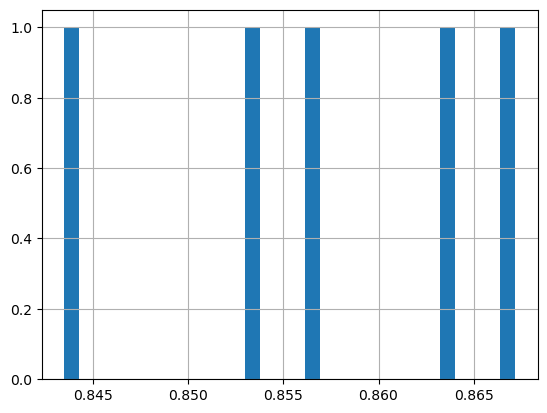

In [50]:
pd.Series(metric_values).hist(bins=30)

In [51]:
# we can change this, need to have reasoning for the model
model = linear_model.LogisticRegression() 
# model = ensemble.GradientBoostingClassifier()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

for f in [confusion_matrix, f1_score, accuracy_score, balanced_accuracy_score]:
    print(str(f).split()[1])
    print(f(y_test, y_pred))

# good scores - so look at the errors!

confusion_matrix
[[3948  246]
 [ 872 3222]]
f1_score
0.8521555144141761
accuracy_score
0.8651061776061776
balanced_accuracy_score
0.8641750759861425


In [53]:
# solve imbalanced data problem

# extract features

# train / test

# evaluate which model is best (optimisation)

# 

In [54]:
t_end = time.time()
t_total = round(t_end - t_start, 3)
mins = int(t_total//60)
seconds = int(t_total%60)

In [55]:
print(f"Time taken: {mins}m{seconds}s")

Time taken: 1m7s
